# Read File

In [66]:
import numpy as np
import pandas as pd

data_file = './/csv//spam.csv'
try:
    df = pd.read_csv(data_file, encoding='utf-8')
except UnicodeDecodeError: # read the data with encoding since there are special or latin characters
  try:
    df = pd.read_csv(data_file, encoding='latin-1')
  except UnicodeDecodeError:
    df = pd.read_csv(data_file, encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [67]:
df.shape

(5572, 5)

# 1. Exploratory Data Analysis and Preprocessing Data

## 1.1. Exploratory Data Analysis

In [68]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [69]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [70]:
# loại bỏ các cột không cần thiết
df.drop(['Unnamed: 2' , 'Unnamed: 3', 'Unnamed: 4'] ,axis=1 , inplace=True)

# Đổi tên cột
df.columns = ['labels', 'texts']
df.head()

,labels,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
# Đếm số lượng missing value
df.isnull().sum()

labels    0
texts     0
dtype: int64

In [72]:
# show 1 lần các gía trị có trong đó
df['labels'].unique()

array(['ham', 'spam'], dtype=object)

In [73]:
# đếm số lượng dòng bị trùng lặp
df.duplicated().sum()

np.int64(403)

In [74]:
df[df.duplicated()]


,labels,texts
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [75]:
df = df.drop_duplicates(keep='first')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5169 non-null   object
 1   texts   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [77]:
df['labels'].value_counts()

labels
ham     4516
spam     653
Name: count, dtype: int64

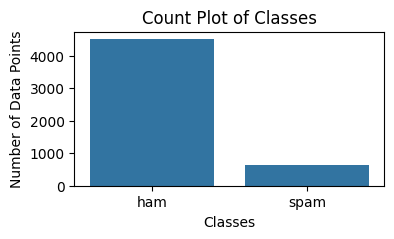

In [78]:

from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(4, 2))
fg = sns.countplot(data = df, x="labels")
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data Points")
plt.show()

Biểu đồ cho thấy dữ liệu đang bị mất cân bằng giữa các lớp spam và ham. Điều này gây ra 1 số vấn đề như:

 - Thiên lệch Mô Hình: Mô hình có xu hướng dự đoán lớp phổ biến hơn, dẫn đến độ chính xác kém trong việc nhận diện lớp ít phổ biến.
 - Đánh Giá Không Đúng: Các chỉ số như độ chính xác (accuracy) có thể không phản ánh đúng hiệu suất của mô hình, đặc biệt khi lớp ít phổ biến rất quan trọng.
 - Hiệu Suất Kém: Mô hình có thể không học được các đặc trưng quan trọng của lớp ít phổ biến, dẫn đến hiệu suất kém trong các tình huống thực tế.
Các Biện Pháp Xử Lý Mất Cân Bằng

 - Tăng Cường Dữ Liệu: tạo thêm mẫu cho lớp ít phổ biến bằng cách sử dụng các kỹ thuật như Synthetic Minority Over-sampling Technique (SMOTE) hoặc các kỹ thuật khuếch đại dữ liệu.
 - Điều Chỉnh Trọng Số Lớp: điều chỉnh trọng số của các lớp để cân bằng ảnh hưởng của chúng trong quá trình huấn luyện (chọn tham số class_weight cho thuân toán, ví dụ RandomForestClassifier(class_weight='balanced'))
 - Sử Dụng Các Chỉ Số Đánh Giá Khác Accuracy: Sử Dụng F1-Score, Precision, Recall

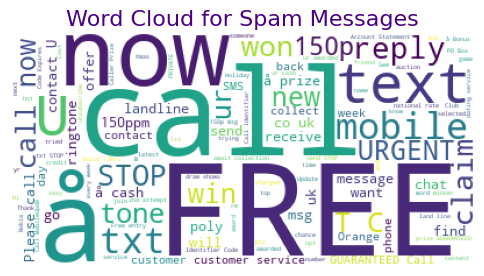

In [79]:
# Filter spam messages
from wordcloud import WordCloud


spam_texts = ' '.join(df[df['labels'] == "spam"]['texts'])
# Generate a word cloud
plt.figure(figsize=(6, 4))
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(spam_texts)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='#4B0082')
plt.show()

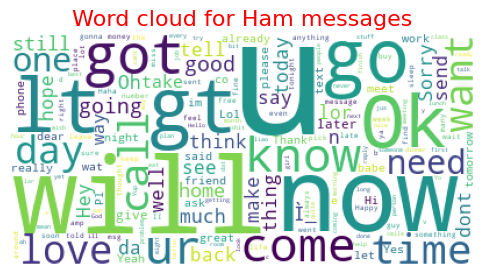

In [80]:
# filter ham messages
spam_texts = ' '.join(df[df['labels'] == 'ham']['texts'])

plt.figure(figsize=(6,4))
wordcloud = WordCloud(width=400, height=200 , background_color='white').generate(spam_texts)
plt.imshow(wordcloud)
plt.title("Word cloud for Ham messages", fontsize=16, color='red' )
plt.axis('off')
plt.show()

Trong nhiều trường hợp, tin nhắn spam có thể có chiều dài khác biệt so với tin nhắn non-spam. Ví dụ, các tin nhắn spam có thể chứa nhiều từ quảng cáo hoặc thông báo dài hơn, trong khi tin nhắn non-spam thường ngắn gọn hơn. Vì vậy,thêm cột chiều dài câu để loại bỏ ảnh hưởng của các yếu tốt, các câu gây nhiễu

In [81]:
df['length'] = df['texts'].apply(len)
df.head()

,labels,texts,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


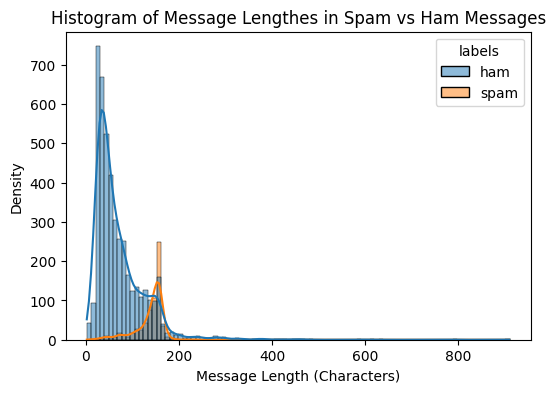

In [82]:
# Plot histogram
plt.figure(figsize=(6,4))
sns.histplot(data=df , x='length', hue='labels', kde=True)
plt.title("Histogram of Message Lengthes in Spam vs Ham Messages")
plt.xlabel('Message Length (Characters)')
plt.ylabel('Density')
plt.show()

Phân phối bị lệch và có đuôi dài xảy ra trong các tình huống như khi dữ liệu có sự hiện diện của một số giá trị outliers lớn, hoặc khi dữ liệu có các giá trị cực đoan hoặc hiếm gặp.

Vì vậy, có thẻ sử dụng các phương pháp như IQR (Interquartile Range), Z-Score, hoặc các kỹ thuật phát hiện giá trị outliers khác để xác định và loại bỏ hoặc điều chỉnh các giá trị outliers.

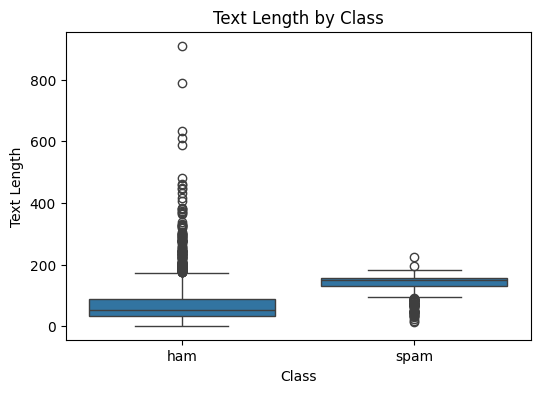

In [83]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='labels', y='length')
plt.title("Text Length by Class")
plt.xlabel('Class')
plt.ylabel("Text Length")
plt.show()

## 1.2. Outlier Handling

Việc loại bỏ nhiễu khỏi bộ dữ liệu là một bước quan trọng trong tiền xử lý dữ liệu vì nó giúp cải thiện chất lượng dữ liệu và làm cho các mô hình học máy hoạt động hiệu quả hơn. Nhiễu có thể gây ra các vấn đề như độ chính xác thấp, khả năng tổng quát kém và kết quả không đáng tin cậy.

Loại Bỏ Nhiễu Sử Dụng Interquartile Range (IQR)

IQR là khoảng giữa phần tư thứ nhất (Q1) và phần tư thứ ba (Q3) của phân phối dữ liệu. Giá trị ngoài khoảng IQR thường được xác định bằng cách sử dụng ngưỡng:

Ngưỡng dưới: Q1 - 1.5 IQR Ngưỡng trên: Q3 + 1.5 IQR Dữ liệu nằm ngoài các ngưỡng trên được coi là nhiễu và có thể bị loại bỏ.

In [84]:
from pandas import DataFrame


def remove_outlier_interquartile(data_sms:DataFrame):
  for email in data_sms['labels'].unique():
    email_type = data_sms[data_sms['labels'] == email]
    selected_colum = email_type["length"]
    q1:float = selected_colum.quantile(0.25)
    q3:float = selected_colum.quantile(0.75)

    iqr:float = q3 - q1
    upper_limit:float  = q3 + 1.5 * iqr
    lower_limit:float  = q1 - 1.5 * iqr

    print(f"q1: {q1}, q3: {q3}, upper_limit: {upper_limit}, lower_limit: {lower_limit}")
    outliers = selected_colum[ (selected_colum > upper_limit) | (selected_colum < lower_limit)].index

    data_sms.drop(index=outliers, inplace=True)

remove_outlier_interquartile(df)

q1: 34.0, q3: 90.0, upper_limit: 174.0, lower_limit: -50.0
q1: 132.0, q3: 157.0, upper_limit: 194.5, lower_limit: 94.5


In [85]:
df.shape

(4960, 3)

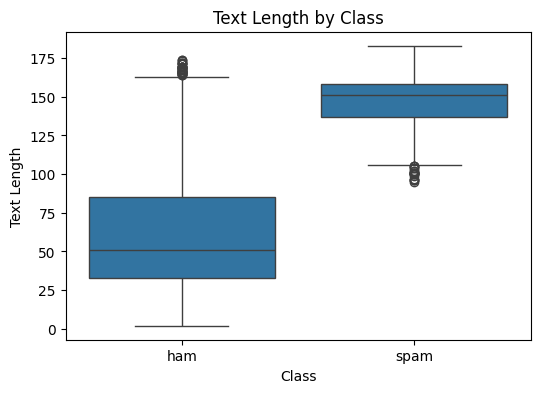

In [86]:
plt.figure(figsize=(6,4))
sns.boxplot(x='labels' , y='length', data= df)
plt.title("Text Length by Class")
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

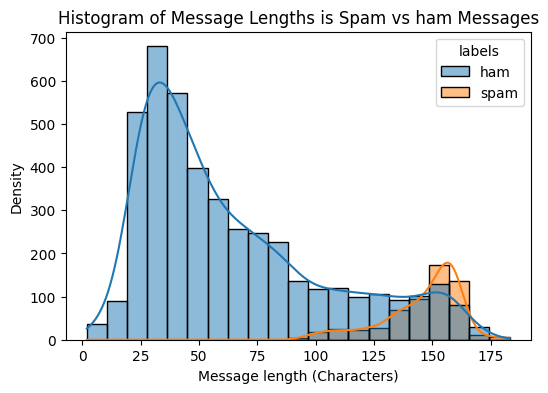

In [87]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='length', hue ='labels', kde=True)
plt.xlabel('Message length (Characters)')
plt.ylabel('Density')
plt.title('Histogram of Message Lengths is Spam vs ham Messages')
plt.show()

In [88]:
# dung xong cot leng thi xoa bo
df = df.drop('length', axis=1)
df.head()

,labels,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Define train test dataset

In [89]:
from typing import List
from numpy import ndarray
from sklearn.model_selection import train_test_split

def define_train()-> List[ndarray]:
  """Định nghĩa dữ liệu trả ra cho dễ code

  Returns:
      List[ndarray]: _description_
  """
  return train_test_split(df['texts'] , df['labels'], test_size=0.3, stratify=df['labels'], random_state=128)


X_train, X_test, y_train, y_test = define_train()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3472,) (3472,)
(1488,) (1488,)


In [90]:
y_train.unique()

array(['ham', 'spam'], dtype=object)

stratify cho phép chỉ định một biến mục tiêu (target variable) để phân chia dữ liệu sao cho tỷ lệ của các lớp trong tập dữ liệu huấn luyện và kiểm tra giống như trong tập dữ liệu gốc. stratify giúp đảm bảo phân phối các lớp trong tập huấn luyện và tập kiểm tra là tương tự như phân phối lớp trong tập dữ liệu gốc

## 1.3. Feature Extraction

TF-IDF Vectorizer giúp chuyển đổi văn bản thành các đặc trưng số mà các mô hình học máy có thể sử dụng.

TF-IDF (Term Frequency-Inverse Document Frequency) là một kỹ thuật biến đổi văn bản được sử dụng để đánh giá tầm quan trọng của một từ trong một tài liệu dựa trên sự xuất hiện của từ đó trong các tài liệu khác.

 - TF (Term Frequency): Tần suất xuất hiện của từ trong một tài liệu.
 - IDF (Inverse Document Frequency): Đánh giá tầm quan trọng của từ dựa trên số lượng tài liệu chứa từ đó.
 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =  TfidfVectorizer(stop_words=["englist"])
vectorizer_texts = vectorizer.fit_transform(X_train)

output_feature_names_vectorizer = vectorizer.get_feature_names_out()
output_feature_names_vectorizer

array(['00', '000', '000pes', ..., 'ûªve', 'ûò', 'ûówell'], dtype=object)

In [92]:
len(output_feature_names_vectorizer)

6546

In [93]:
pd.DataFrame(data = vectorizer_texts.toarray(), columns= vectorizer.get_feature_names_out())

,00,000,000pes,008704050406,0089,01223585236,01223585334,02,0207,02072069400,...,åôrents,ì_,ìä,ìï,ó_,û_,û_thanks,ûªve,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4. Feature Transformation

### 1.4.1. Dimensionality Reduction
TruncatedSVD (Truncated Singular Value Decomposition) là một kỹ thuật phân tích ma trận trong học máy và khai thác dữ liệu. Đây là một phương pháp giảm chiều khi làm việc với dữ liệu thưa (sparse data), chẳng hạn như ma trận TF-IDF trong xử lý ngôn ngữ tự nhiên.

TruncatedSVD giúp loại bỏ các đặc trưng ít quan trọng và giảm nguy cơ quá khớp (overfitting). Điều này giúp cải thiện hiệu suất của các mô hình học máy và giảm thời gian huấn luyện.

In [94]:
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=256)
reduce_dimenstion_text = svd.fit_transform(vectorizer_texts)

In [95]:
output_feature_names_svd = svd.get_feature_names_out()
len(output_feature_names_svd)

256

In [96]:
pd.DataFrame(data=reduce_dimenstion_text, columns=svd.get_feature_names_out())

,truncatedsvd0,truncatedsvd1,truncatedsvd2,truncatedsvd3,truncatedsvd4,truncatedsvd5,truncatedsvd6,truncatedsvd7,truncatedsvd8,truncatedsvd9,...,truncatedsvd246,truncatedsvd247,truncatedsvd248,truncatedsvd249,truncatedsvd250,truncatedsvd251,truncatedsvd252,truncatedsvd253,truncatedsvd254,truncatedsvd255
0,0.083113,0.074805,0.012943,-0.012513,-0.004442,0.015194,0.007187,0.007305,-0.013855,-0.026555,...,-0.008950,-0.004971,-0.010012,-0.004027,0.014302,0.001705,0.023862,0.016198,-0.001886,-0.013235
1,0.263480,-0.004172,-0.108429,0.055403,0.034518,0.071496,-0.040956,0.092391,-0.059116,-0.043867,...,-0.009235,-0.017358,0.009986,-0.003985,0.003784,-0.024734,-0.010139,0.015259,0.003782,-0.045047
2,0.042765,-0.110106,0.183863,0.055170,-0.029588,0.019109,0.008456,-0.030818,0.089597,-0.065315,...,0.000776,0.022109,-0.002533,-0.008689,-0.004707,0.002200,0.001088,0.003965,0.002805,0.004518
3,0.116013,-0.073678,-0.086221,0.031073,-0.046502,-0.017476,-0.105641,-0.004362,-0.037267,-0.073524,...,0.002553,0.002734,0.025977,0.017707,-0.038630,0.020518,-0.008825,0.006391,0.011968,-0.007791
4,0.103332,-0.008496,-0.108219,0.095956,-0.013409,0.059181,-0.065727,0.013466,0.048631,0.061743,...,-0.008827,0.080315,0.042966,0.103448,-0.006704,0.017273,0.033986,-0.042057,-0.027616,-0.008569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,0.035836,-0.011311,0.002305,-0.002823,-0.027523,-0.000781,-0.008146,-0.022126,-0.000732,-0.001591,...,-0.022154,-0.053834,0.036330,0.094136,-0.015334,-0.078901,0.008079,-0.038763,-0.030058,0.000179
3468,0.102402,-0.066024,-0.079419,0.060809,0.016823,0.001225,-0.009612,0.049267,0.033889,0.039039,...,-0.048949,0.008385,-0.014727,-0.073510,0.003568,-0.003054,0.003865,0.017647,0.053269,-0.018824
3469,0.094506,-0.027381,0.102584,0.001607,-0.078419,0.067956,0.005450,-0.070263,0.114008,-0.057303,...,0.035340,0.046640,-0.049882,-0.048447,-0.012900,-0.004100,0.008942,-0.008621,-0.031042,0.020398
3470,0.152694,-0.021997,-0.079075,-0.149270,0.214198,0.086177,0.009862,0.044973,-0.004076,-0.059431,...,0.038602,0.009354,0.022949,0.009222,0.001087,0.074216,-0.023151,0.007174,-0.013737,0.016472


In [97]:
X_train = reduce_dimenstion_text
X_train.shape

(3472, 256)

In [98]:
X_test= svd.transform(vectorizer.transform(X_test))
X_test.shape

(1488, 256)

### 1.4.2 Encoding Categorical Features
Nhiều thuật toán học máy yêu cầu đầu vào là các giá trị số. Vì vậy, các đặc trưng phân loại (categorical features) cần được chuyển đổi thành dạng số trước khi đưa vào mô hình.

In [99]:
from sklearn.calibration import LabelEncoder


encoder  = LabelEncoder()

# Học trên tập dữ liệu
y_train:ndarray = encoder.fit_transform(y_train)
y_train.shape

(3472,)

In [100]:
# chỉ mã hóa không cho học
y_test:ndarray= encoder.transform(y_test)
y_test.shape

(1488,)

# 2. Model Training and Evaluation

In [101]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3472, 256) (3472,)
(1488, 256) (1488,)


In [102]:
from typing import TypedDict
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#  Phân loại và hồi quy
from sklearn.svm import SVC

class ModelsAI(TypedDict):
  SVC : SVC
  # KNN : KNeighborsClassifier
  # DT : DecisionTreeClassifier
  LR : LogisticRegression
  MLP: MLPClassifier
  # RF : RandomForestClassifier
  # ADB : AdaBoostClassifier
  # BCG : BaggingClassifier
  # ETC : ExtraTreesClassifier
  # GBDT : GradientBoostingClassifier
  # XGB : XGBClassifier

list_models:ModelsAI = {
  'LR' : LogisticRegression(),
  'SVC': SVC(),
  'MLP': MLPClassifier(),
}


In [103]:
from typing import Any

from numpy import dtype, floating


class PramsSVC(TypedDict):
  C :ndarray[Any, dtype[floating[Any]]]   # Điều chỉnh độ quan trọng của lỗi phân loại trên tập huấn luyện
  karnel : List[str]                      # Chọn loại karnel phù hợp
  # degree : List[int]                    # Số bậc đa thức cho kernel rbf, poly, sigmoid
  gamma :List[str]                        #  # Hệ số cho kernel rbf, poly, sigmoid
  class_weight: List[Any]                 #  # Tự động điều chỉnh trọng số class

params_svc = {
    'C': np.logspace(-1, 3, 5),  # Điều chỉnh độ quan trọng của lỗi phân loại trên tập huấn luyện
    'kernel': ['linear', 'rbf', 'poly'],  # Chọn loại kernel phù hợp
    #'degree': [3, 4],  # Số bậc đa thức cho kernel poly
    'gamma': ['scale','auto'],  # Hệ số cho kernel rbf, poly, sigmoid
    'class_weight': [None, 'balanced']  # Tự động điều chỉnh trọng số class
}


In [104]:
params_mlp = {
    'hidden_layer_sizes': [(200,200),(100,200,100)], # Cấu trúc mạng nơ-ron; ảnh hưởng đến khả năng học của mô hình.
    #'activation': ['relu', 'tanh'], # Hàm kích hoạt; quyết định cách nơ-ron kích hoạt và học.
    #'solver': ['adam'], # Thuật toán tối ưu hóa; ảnh hưởng đến tốc độ và hiệu quả của quá trình huấn luyện.
    'alpha': [0.001, 0.01], # Hệ số regularization; ngăn ngừa overfitting.
    'learning_rate': ['adaptive'], # Tốc độ học; ảnh hưởng đến cách cập nhật trọng số.
    #'batch_size': [16, 32], # Kích thước batch; ảnh hưởng đến hiệu suất và thời gian huấn luyện.
    'max_iter': [800, 1000] # Số vòng lặp tối đa; đảm bảo mô hình hội tụ.
}

In [105]:
params_knn = {
    'n_neighbors': np.arange(1, 31),  # Số lượng láng giềng gần nhất cần xét
    'weights': ['uniform', 'distance'],  # Trọng số cho các điểm láng giềng
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Khoảng cách sử dụng
}

In [106]:
params_nb = {
    'alpha': np.logspace(-3, 1, 5),  # Tham số điều chỉnh độ mịn để tránh xác suất bằng 0
    'fit_prior': [True, False]  # Có nên tính toán phân phối trước dựa trên dữ liệu huấn luyện
}

In [107]:
params_dt = {
    'criterion': ['gini', 'entropy'],  # Hàm mất mát dùng để đánh giá sự phân tách
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),  # Độ sâu tối đa của cây
    'min_samples_split': np.arange(2, 10),  # Số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': np.arange(1, 5),  # Số lượng mẫu tối thiểu ở một nút lá
    'max_features': ['auto', 'sqrt', 'log2'],  # Số lượng đặc trưng xét khi chia nút
}

In [108]:
params_lr = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 2, 5),
    'solver': ['liblinear', 'saga'],  # Thuật toán tối ưu
    'max_iter': [1200, 1500],  # Số vòng lặp tối đa cho việc hội tụ
}

In [109]:
params_rf = {
    'n_estimators': np.arange(20, 200, 20),  # Số lượng cây trong rừng
    #'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],  # Độ sâu tối đa của từng cây
    #'min_samples_split': np.arange(2, 10),  # Số lượng mẫu tối thiểu để chia nút
    #'min_samples_leaf': np.arange(1, 5),  # Số lượng mẫu tối thiểu ở nút lá
    # 'bootstrap': [True, False],  # Có hay không lấy mẫu lại dữ liệu
    #'max_features': ['auto', 'sqrt', 'log2'],  # Số lượng đặc trưng xét khi chia nút
    'class_weight': ['balanced']  # Tự động điều chỉnh trọng số class
}

In [110]:
params_ada = {
    'n_estimators': np.arange(50, 200, 10),  # Số lượng ước lượng yếu (weak learners)
    'learning_rate': np.logspace(-3, 0, 4),  # Tốc độ học
    'algorithm': ['SAMME', 'SAMME.R']  # Thuật toán cập nhật trọng số
}

In [111]:
params_bagging = {
    'n_estimators': np.arange(10, 200, 10),  # Số lượng bộ phân loại
    'max_samples': np.linspace(0.5, 1.0, 6),  # Tỷ lệ mẫu lấy từ dữ liệu huấn luyện
    'max_features': np.linspace(0.5, 1.0, 6),  # Tỷ lệ đặc trưng lấy mẫu từ dữ liệu
    'bootstrap': [True, False],  # Lấy mẫu lại dữ liệu
    'bootstrap_features': [True, False]  # Lấy mẫu lại đặc trưng
}

In [112]:
params_ext = {
    'n_estimators': np.arange(10, 200, 10),  # Số lượng cây trong rừng
    'max_depth': np.arange(1, 20),  # Độ sâu tối đa của cây
    'min_samples_split': np.arange(2, 10),  # Số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': np.arange(1, 5),  # Số lượng mẫu tối thiểu ở nút lá
    'bootstrap': [True, False],  # Có hay không lấy mẫu lại dữ liệu
    'max_features': ['auto', 'sqrt', 'log2'],  # Số lượng đặc trưng xét khi chia nút
}

In [113]:
params_gb = {
    'n_estimators': np.arange(50, 200, 10),  # Số lượng cây
    'learning_rate': np.logspace(-3, 0, 4),  # Tốc độ học
    'max_depth': np.arange(1, 20),  # Độ sâu tối đa của cây
    'min_samples_split': np.arange(2, 10),  # Số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': np.arange(1, 5),  # Số lượng mẫu tối thiểu ở nút lá
    'subsample': np.linspace(0.5, 1.0, 6),  # Tỷ lệ mẫu huấn luyện cho mỗi cây
    'max_features': ['auto', 'sqrt', 'log2'],  # Số lượng đặc trưng xét khi chia nút
}

In [114]:
params_xgb = {
    'n_estimators': np.arange(100, 1000, 100),  # Số lượng cây
    #'learning_rate': np.logspace(-3, -1, 3),  # Tốc độ học
    #'max_depth': np.arange(10, 20, 2),  # Độ sâu tối đa của cây
    #'min_child_weight': np.arange(2, 10, 2),  # Trọng số tối thiểu cho một lá
    #'subsample': np.linspace(0.5, 1.0, 3),  # Tỷ lệ mẫu huấn luyện cho mỗi cây
    #'colsample_bytree': np.linspace(0.5, 1.0, 3),  # Tỷ lệ đặc trưng chọn cho mỗi cây
    #'gamma': np.logspace(-2, 1, 4),  # Hệ số cho việc giảm nhiễu
    #'reg_alpha': np.logspace(-1, 1, 3),  # Regularization L1
    #'reg_lambda': np.logspace(-1, 1, 3)  # Regularization L2
}

In [115]:
hyperparameters = {
    'SVC': params_svc,
    'MLP': params_mlp,
    #'KNN': params_knn,
    #'DT': params_dt,
    'LR': params_lr,
    #'RF': params_rf,
    #'Adaboost': params_ada,
    #'BCG': params_bagging,
    #'ETC': params_ext,
    #'GBDT': params_gb,
    #'XGB': params_xgb
}

In [116]:
from sklearn.metrics import fbeta_score, make_scorer


def fbeta(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.9)

metric = make_scorer(fbeta)

In [137]:
import time

from sklearn.model_selection import GridSearchCV


model_tuning:dict[str, GridSearchCV] = {}
start = time.time()

for k, v in list_models.items():
    search = GridSearchCV(v, hyperparameters[k], cv=5, n_jobs=12, scoring=("f1"), error_score=0, verbose=3)
    search.fit(X_train, y_train)
    model_tuning[k] = search

end = time.time()
print("The time of execution of above program is :",(end-start), "s")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

In [62]:
best_score = []
for k,v in model_tuning.items():
    best_score.append(v.best_score_)
    print(f"Model: {k}, best_score: {v.best_score_} \n best_estimator: {v.best_estimator_} \n best_params_: {v.best_params_}")
    print()

Model: LR, best_score: 0.9136468406823296 
 best_estimator: LogisticRegression(C=np.float64(100.0), max_iter=1200, solver='saga') 
 best_params_: {'C': np.float64(100.0), 'max_iter': 1200, 'penalty': 'l2', 'solver': 'saga'}

Model: SVC, best_score: 0.951141819028676 
 best_estimator: SVC(C=np.float64(0.1), class_weight='balanced') 
 best_params_: {'C': np.float64(0.1), 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

Model: MLP, best_score: 0.9325003876059421 
 best_estimator: MLPClassifier(alpha=0.001, hidden_layer_sizes=(200, 200),
              learning_rate='adaptive', max_iter=1000) 
 best_params_: {'alpha': 0.001, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'adaptive', 'max_iter': 1000}



In [54]:
# chọn ra model tốt nhất sau khi tinh chỉnh siêu tham số

idx = best_score.index(max(best_score))
name_best_model = list(model_tuning.keys())[idx]
name_best_model

'SVC'

In [55]:
# đánh giá model trên tập dữ liệu kiểm tra

from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


best_model = model_tuning[name_best_model].best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: {}, Precision: {}, Recall: {}, F1: {}".format(accuracy, precision, recall, f1))

Accuracy: 0.9825268817204301, Precision: 0.9166666666666666, Recall: 0.9375, F1: 0.9269662921348315


In [56]:
new_text = ["you got a free voucher, click in this link to get it: https://kis.dkslai.com"]
new_test = svd.transform(vectorizer.transform(new_text))
best_model.predict(new_test)

array([1])

In [57]:
from sklearn.metrics import confusion_matrix


cfm = confusion_matrix(y_test, y_pred)
cfm

array([[1297,   15],
       [  11,  165]])

Text(45.722222222222214, 0.5, 'truth')

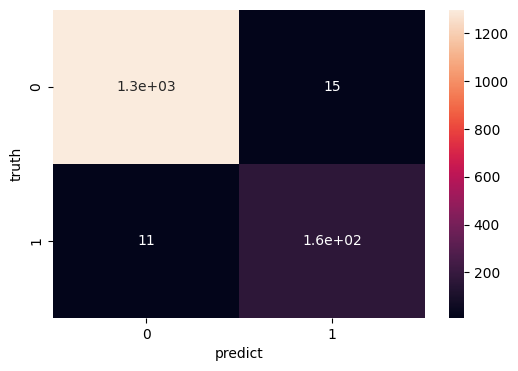

In [58]:
plt.figure(figsize=(6,4))
sns.heatmap(cfm, annot=True)
plt.xlabel('predict')
plt.ylabel('truth')

In [59]:
# lưu lại model thành file để tái sử dụng cho các lần sau
import joblib


joblib.dump(best_model, './/models//Spam_email.pkl')

['.//models//Spam_email.pkl']

In [60]:
# load model từ file và sử dụng
clf_from_joblib = joblib.load('.//models//Spam_email.pkl')
y_per_2 = clf_from_joblib.predict(X_test)
cfm = accuracy_score(y_test, y_per_2)
cfm

0.9825268817204301

# Testing

Trả về danh sách các từ bị mã hóa

In [63]:
encoder.classes_

array(['ham', 'spam'], dtype=object)

In [135]:
from faker import Faker
Faker.seed(0)
faker =Faker()
content = faker.texts(nb_texts=10, max_nb_chars=500 )
content


content = svd.transform(vectorizer.transform(content))
content.shape


(10, 256)

In [136]:
best_model.predict(content)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])